In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st
import researchpy as rs
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm

In [73]:
df=pd.read_excel("500MM2.xlsx")

In [74]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,TELEMAR,7696136,7.836,0.4218,55.977
1,TELEFONICA,7256514,14.137,0.6093,38.128
2,CBB/AMBEV,7055807,10.649,0.6162,66.055


In [75]:
variaveis = ["Vendas", "Rentabilidade", "Liquidezgeral", "Endividamentogeral"]

In [76]:
z_variaveis = []
for var in variaveis:
    z_variaveis.append("z_" + var)

In [77]:
z_variaveis

['z_Vendas', 'z_Rentabilidade', 'z_Liquidezgeral', 'z_Endividamentogeral']

In [78]:
X = df[variaveis]
X_std = StandardScaler().fit_transform(X)

In [79]:
X_std

array([[ 2.75198109e+00, -4.82481505e-01, -1.03284841e+00,
        -4.32524286e-02],
       [ 2.50077237e+00, -5.02119208e-02, -5.35965507e-01,
        -1.29415051e+00],
       [ 2.38608441e+00, -2.89500337e-01, -5.17680216e-01,
         6.63036487e-01],
       [ 2.01470038e+00,  1.21708025e-01,  1.09752048e+00,
        -3.74110731e-01],
       [ 1.52177878e+00,  1.79266219e-01, -1.21914638e+00,
        -1.71345261e+00],
       [ 1.44195486e+00,  2.75105071e-01,  2.26716628e-01,
         1.05535692e+00],
       [ 1.26580613e+00,  4.18623238e-01, -7.51231745e-02,
         2.10021319e+00],
       [ 1.18346281e+00, -6.37456428e-01, -5.22450292e-01,
         7.35746821e-02],
       [ 8.46608542e-01, -5.90600353e-01, -2.01530186e-01,
        -2.12290816e-01],
       [ 7.23201288e-01, -3.70388808e+00,  4.34214930e-01,
         8.20301056e-01],
       [ 6.36287189e-01,  7.40304254e-01, -1.06014385e+00,
         9.94805858e-01],
       [ 6.07638485e-01, -1.00635369e-01, -6.18381819e-01,
      

In [80]:
df = pd.concat([df, pd.DataFrame(X_std, columns=z_variaveis)], axis=1)

In [81]:
distance.cdist(df[variaveis], 
               df[variaveis], 'sqeuclidean')

array([[0.00000000e+00, 1.93267503e+11, 4.10021228e+11, ...,
        4.24138025e+13, 4.24703636e+13, 4.27572132e+13],
       [1.93267503e+11, 0.00000000e+00, 4.02833006e+10, ...,
        3.68809160e+13, 3.69336604e+13, 3.72011921e+13],
       [4.10021228e+11, 4.02833006e+10, 0.00000000e+00, ...,
        3.44834258e+13, 3.45344276e+13, 3.47931398e+13],
       ...,
       [4.24138025e+13, 3.68809160e+13, 3.44834258e+13, ...,
        0.00000000e+00, 1.88449218e+07, 6.92322176e+08],
       [4.24703636e+13, 3.69336604e+13, 3.45344276e+13, ...,
        1.88449218e+07, 0.00000000e+00, 4.82725877e+08],
       [4.27572132e+13, 3.72011921e+13, 3.47931398e+13, ...,
        6.92322176e+08, 4.82725877e+08, 0.00000000e+00]])

(-3, 3)

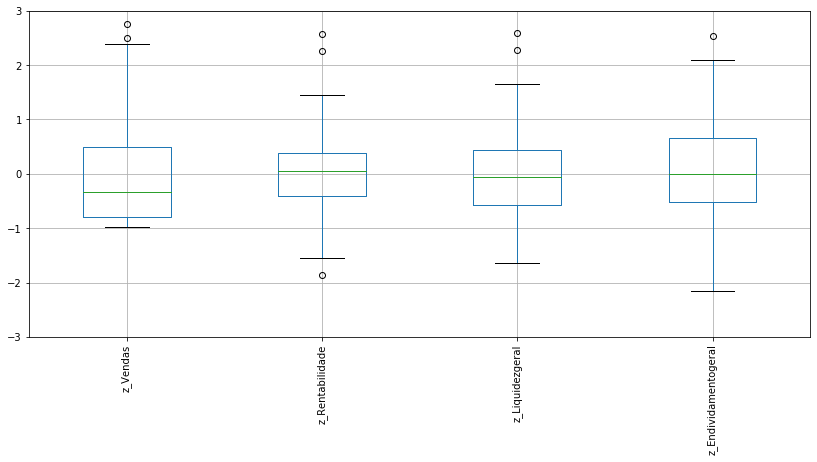

In [82]:
df[z_variaveis].boxplot(rot=90,figsize=[14,6])
plt.ylim(-3,3)

In [83]:
Z = linkage(df[z_variaveis], method='single', metric='sqeuclidean')

In [84]:
print ('Planejamento da Aglomeração\n')
print(Z)

Planejamento da Aglomeração

[[37.         47.          0.23340563  2.        ]
 [39.         48.          0.26205619  3.        ]
 [18.         30.          0.26886874  2.        ]
 [21.         50.          0.29920644  3.        ]
 [ 7.          8.          0.30037509  2.        ]
 [28.         49.          0.30652503  4.        ]
 [51.         53.          0.31980538  7.        ]
 [42.         54.          0.36638497  8.        ]
 [31.         33.          0.38739349  2.        ]
 [17.         24.          0.44816616  2.        ]
 [55.         57.          0.45616027 10.        ]
 [27.         58.          0.61799704 11.        ]
 [38.         46.          0.61958118  2.        ]
 [15.         59.          0.62633999 12.        ]
 [22.         61.          0.6282071  13.        ]
 [13.         62.          0.65752182 14.        ]
 [16.         63.          0.67954683 15.        ]
 [34.         35.          0.68795981  2.        ]
 [52.         64.          0.71956256 17.        ]
 [

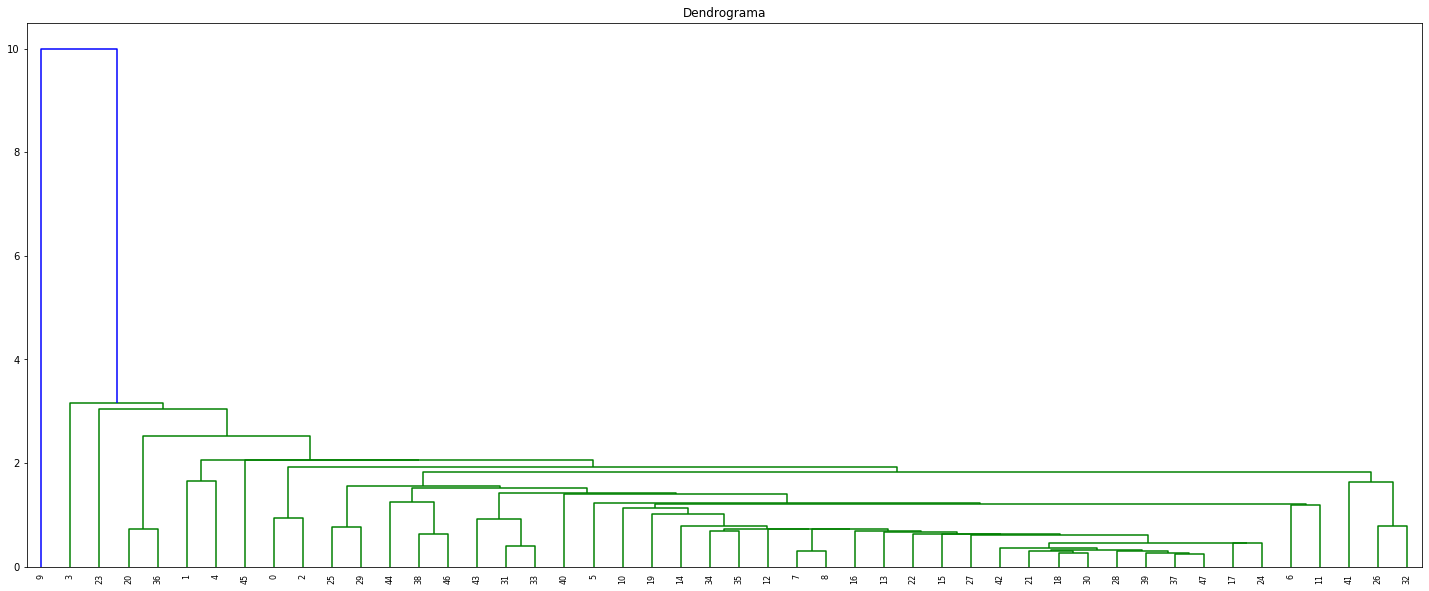

In [85]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Dendrograma") 
plt.show()

In [86]:
parada = pd.DataFrame(Z, columns=["c1", "c2", "dist", "n"])

In [87]:
# As primeiras 5 linhas do Daframe Criado
parada.head()

,c1,c2,dist,n
0,37.0,47.0,0.233406,2.0
1,39.0,48.0,0.262056,3.0
2,18.0,30.0,0.268869,2.0
3,21.0,50.0,0.299206,3.0
4,7.0,8.0,0.300375,2.0


In [88]:
parada['heterogeneidade'] = ((parada['dist'].shift(-1) - parada['dist']) / parada['dist']) * 100

In [90]:
parada.tail(10)

,c1,c2,dist,n,heterogeneidade
37,41.0,72.0,1.623536,3.0,1.854182
38,1.0,4.0,1.653639,2.0,9.833931
39,84.0,85.0,1.816257,38.0,5.428933
40,74.0,87.0,1.914860,40.0,7.164167
41,45.0,88.0,2.052044,41.0,0.465758
42,86.0,89.0,2.061601,43.0,21.878524
43,68.0,90.0,2.512649,45.0,20.811000
44,23.0,91.0,3.035557,46.0,3.876993
45,3.0,92.0,3.153245,47.0,217.004621
46,9.0,93.0,9.995933,48.0,NaN


In [91]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='sqeuclidean', linkage='single')  

In [92]:
cluster.fit_predict(df[z_variaveis])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [93]:
cluster.fit(df[z_variaveis])

AgglomerativeClustering(affinity='sqeuclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [94]:
cluster.get_params()

{'affinity': 'sqeuclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'single',
 'memory': None,
 'n_clusters': 2,
 'pooling_func': 'deprecated'}

In [95]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [96]:
cluster.n_leaves_

48

In [97]:
cluster.n_clusters

2

In [98]:
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo9'])], axis=1)

In [99]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,grupo9
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252,0
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151,0
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036,0


In [100]:
df.groupby('grupo9').count()['Empresa']

grupo9
0    47
1     1
Name: Empresa, dtype: int64

In [101]:
grupo_3 = df.groupby('grupo9').mean()[z_variaveis].round(2)

In [102]:
grupo_3

,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
grupo9,,,,
0,-0.02,0.08,-0.01,-0.02
1,0.72,-3.70,0.43,0.82


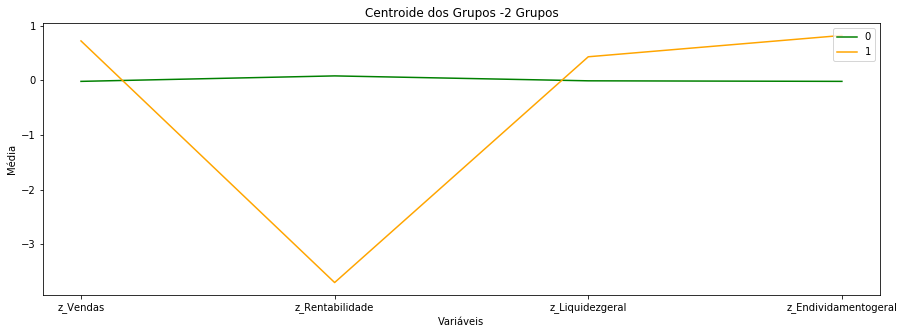

In [104]:
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_3.loc[0], color='g')
plt.plot(z_variaveis, grupo_3.loc[1], color='orange')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos -2 Grupos')
plt.legend(["0","1","2"], loc=1)
plt.show()

In [108]:
kmeans = KMeans(n_clusters=2, init=grupo_3, n_init=1).fit(df[z_variaveis])

In [109]:
kmeans

KMeans(algorithm='auto', copy_x=True,
       init=        z_Vendas  z_Rentabilidade  z_Liquidezgeral  z_Endividamentogeral
grupo9                                                                  
0          -0.02             0.08            -0.01                 -0.02
1           0.72            -3.70             0.43                  0.82,
       max_iter=300, n_clusters=2, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [110]:
# Agrupa cada um dos elementos da amostra em um dos 4 grupos possíveis.
y_kmeans = kmeans.predict(df[z_variaveis])

In [111]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [112]:
df['kmeans'] = kmeans.labels_

In [113]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,grupo9,kmeans
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252,0,0
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151,0,0
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036,0,0


In [114]:
lens = []
for i in np.sort(list(df['kmeans'].unique())):
    lens.append(len(df.loc[df['kmeans'] == i,:]))
    print("Cluster ", i, ": ", lens[i])

Cluster  0 :  47
Cluster  1 :  1


In [116]:
df.groupby('kmeans').count()['Empresa']

kmeans
0    47
1     1
Name: Empresa, dtype: int64

In [117]:
# Gera o centroide final dos grupos.
k_means_centro = df.groupby('kmeans').mean()[z_variaveis].round(2)

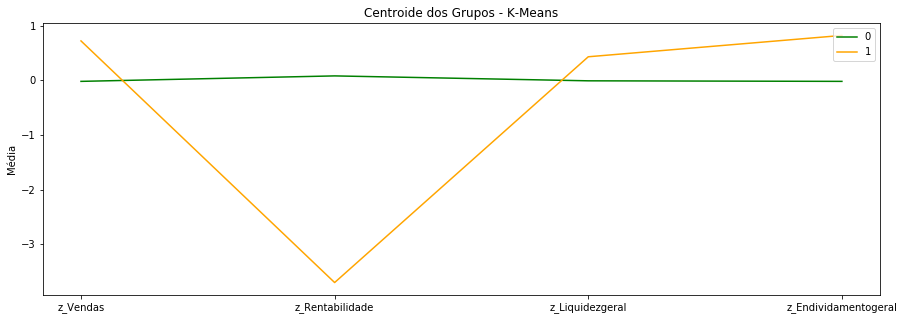

In [118]:
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, k_means_centro.loc[0], color='g')
plt.plot(z_variaveis, k_means_centro.loc[1], color='orange')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - K-Means')
plt.legend(["0","1"], loc=1)
plt.show()

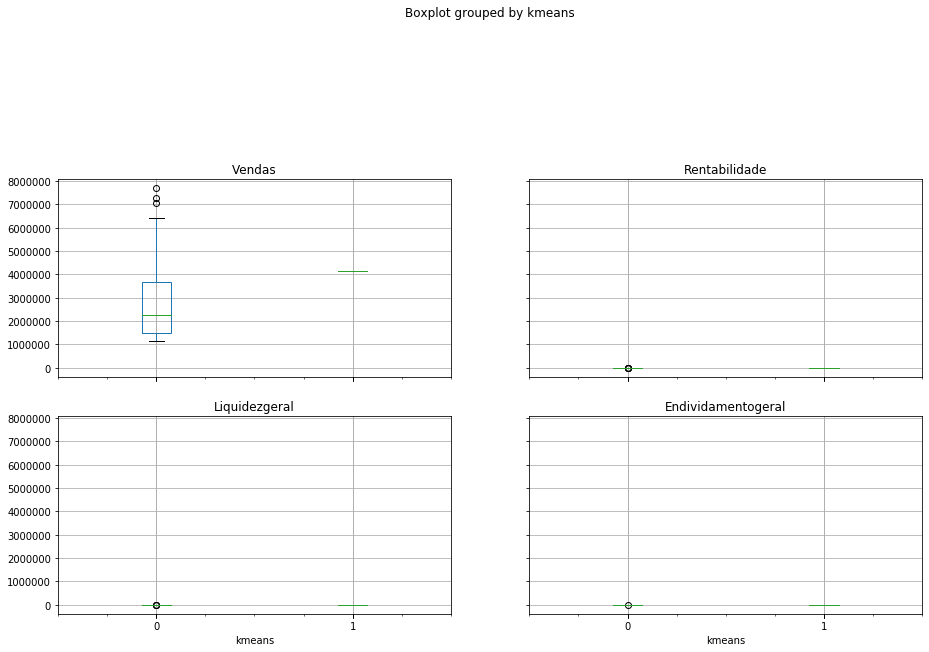

In [119]:
boxplot = df.boxplot(column=variaveis, by='kmeans', layout=(7,2), figsize=[15,30], showfliers=True)